In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from sklearn.datasets import load_iris


In [32]:

iris = load_iris()

X = iris.data
y = iris.target


In [33]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
x = np.array([[1,2,3],[1,2,3]])
a = x[:,2].reshape(-1,1)
print(a)
print(x)
prod = x
prod = a * x
print(prod)
print(x)

[[3]
 [3]]
[[1 2 3]
 [1 2 3]]
[[3 6 9]
 [3 6 9]]
[[1 2 3]
 [1 2 3]]


In [39]:
class Correlation:
  def __init__(self):
    print("Constructor")

  def pearson_corr(self,X):
    nexamples,nfeatures = X.shape
    n = nexamples
    self.corr_matrix = np.zeros((nfeatures,nfeatures))
    mean = np.mean(X,axis = 0)
    for i in range(nfeatures):
      y = np.copy(X)
      x = X[:,i]
      x = x.reshape(-1,1)
      sum_x = np.sum(x,axis=0)
      sum_y = np.sum(y,axis = 0)
      sum_xy = np.sum(x * y,axis = 0)
      sum_x_sum_y = sum_x * sum_y
      x_square_sum = np.sum(x**2,axis = 0)
      sum_x_square = sum_x ** 2
      y_square_sum = np.sum(y**2,axis = 0)
      sum_y_square = sum_y ** 2
      numerator = (n * sum_xy - sum_x_sum_y)
      denominator =  np.sqrt(( n * x_square_sum - sum_x_square) * (n * y_square_sum - sum_y_square))
      r =  numerator / denominator
      self.corr_matrix[i,:] = r

    return self.corr_matrix

  def spearman_corr(self,X):
    n_samples, n_features = X.shape
    corr_matrix = np.zeros((n_features, n_features))

    # Convert data to ranks
    X_ranked = np.apply_along_axis(rankdata, axis=0, arr=X)

    for i in range(n_features):
        x = X_ranked[:, i]
        x = x.reshape(-1,1)
        y = np.copy(X_ranked)
        d = x - y
        d_squared_sum = np.sum(d**2,axis = 0)

        # Apply Spearman formula
        n = len(x)
        rho = 1 - (6 * d_squared_sum) / (n * (n**2 - 1))
        corr_matrix[i,:] = rho

    return corr_matrix







c = Correlation()
pearson_matrix = c.pearson_corr(X)
spearman_matrix = c.spearman_corr(X)
spearman_matrix




Constructor


array([[ 1.        , -0.16076003,  0.88213076,  0.83524157],
       [-0.16076003,  1.        , -0.30268456, -0.27726832],
       [ 0.88213076, -0.30268456,  1.        ,  0.93803013],
       [ 0.83524157, -0.27726832,  0.93803013,  1.        ]])

array([[ 37. , 128.5,  18. ,  20. ],
       [ 19.5,  70.5,  18. ,  20. ],
       [ 10.5, 101. ,   8. ,  20. ],
       [  7.5,  89. ,  31. ,  20. ],
       [ 27.5, 133.5,  18. ,  20. ],
       [ 49.5, 145.5,  46.5,  45. ],
       [  7.5, 119.5,  18. ,  38. ],
       [ 27.5, 119.5,  31. ,  20. ],
       [  3. ,  52.5,  18. ,  20. ],
       [ 19.5,  89. ,  31. ,   3. ],
       [ 49.5, 137. ,  31. ,  20. ],
       [ 14. , 119.5,  41. ,  20. ],
       [ 14. ,  70.5,  18. ,   3. ],
       [  1. ,  70.5,   2. ,   3. ],
       [ 77. , 147. ,   3.5,  20. ],
       [ 69.5, 150. ,  31. ,  45. ],
       [ 49.5, 145.5,   8. ,  45. ],
       [ 37. , 128.5,  18. ,  38. ],
       [ 69.5, 141.5,  46.5,  38. ],
       [ 37. , 141.5,  31. ,  38. ],
       [ 49.5, 119.5,  46.5,  20. ],
       [ 37. , 137. ,  31. ,  45. ],
       [  7.5, 133.5,   1. ,  20. ],
       [ 37. , 110.5,  46.5,  49. ],
       [ 14. , 119.5,  49.5,  20. ],
       [ 27.5,  70.5,  41. ,  20. ],
       [ 27.5, 119.5,  41. ,  45. ],
 

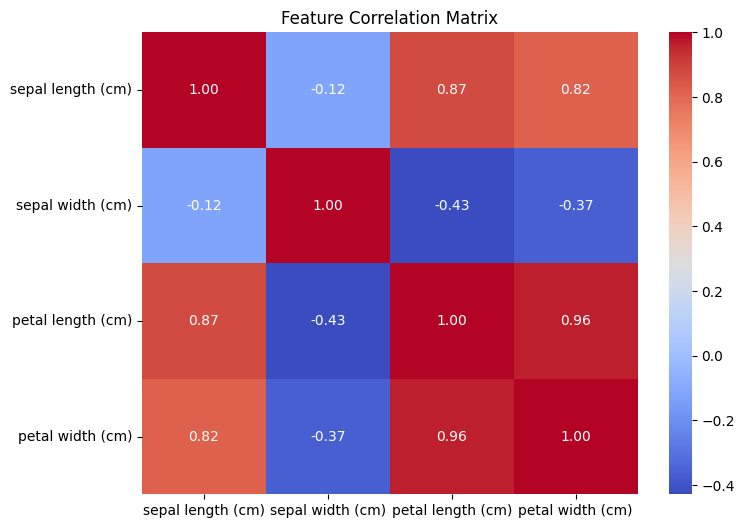

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
def brute_force_feature_selection(df, threshold=0.9):
    """
    Removes features that are highly correlated using a brute-force approach.
    """
    correlated_features = set()
    correlation_matrix = df.corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    return df.drop(columns=correlated_features)

# Apply Brute Force selection
df_brute_force = brute_force_feature_selection(df)
print("Remaining features after Brute Force selection:")
print(df_brute_force.columns)


Remaining features after Brute Force selection:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def group_based_feature_selection(df, y, threshold=0.9):
    """
    Groups correlated features and selects the most important one.
    """
    correlation_matrix = df.corr()
    groups = []  # To store groups of correlated features
    selected_features = set(df.columns)  # Start with all features

    # Identify groups of correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                group = set([correlation_matrix.columns[i], correlation_matrix.columns[j]])
                groups.append(group)

    # Train a model to get feature importances
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(df, y)
    feature_importance = dict(zip(df.columns, model.feature_importances_))

    # Select the most important feature from each group
    for group in groups:
        best_feature = max(group, key=lambda x: feature_importance[x])  # Select the highest importance
        selected_features -= group  # Remove all
        selected_features.add(best_feature)  # Add only the best one

    return df[list(selected_features)]

# Apply Group-Based Selection
df_group_based = group_based_feature_selection(df, iris.target)
print("Remaining features after Group-Based selection:")
print(df_group_based.columns)


Remaining features after Group-Based selection:
Index(['petal length (cm)', 'sepal length (cm)', 'sepal width (cm)'], dtype='object')
